In [50]:
%matplotlib inline


In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pathlib import Path

In [53]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path = Path('../Resources/Rental_USA_csv.csv')
# Read the csv file
rental_df = pd.read_csv(file_path)
# Display data
rental_df.head()


,price,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,AK,1745,1856,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
2,AL,1003,947,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
3,AR,809,850,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
4,AZ,1218,1162,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609


In [54]:
#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'price'

# Convert all values to float except the specified object column
rental_df_clean = rental_df.replace(',','', regex = True)
rental_df_clean.loc[:, rental_df_clean.columns != object_column] = rental_df_clean.loc[:, rental_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')
#homelesess_df_numeric = homelesess_df_clean.apply(pd.to_numeric, errors='coerce')
rental_df_clean.head()

,price,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,AK,1745,1856,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
2,AL,1003,947,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
3,AR,809,850,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
4,AZ,1218,1162,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609


In [55]:
#Renaming columns
rental_df_clean = rental_df_clean.rename(columns={'Unnamed: 12' : 'rental_2021', 'Unnamed: 13': 'rental_2022',
       'Unnamed: 3' : 'rental_2012', 'Unnamed: 4' : 'rental_2013',
       'Unnamed: 5' : 'rental_2014', 'Unnamed: 6' : 'rental_2015',
       'Unnamed: 7' : 'rental_2016', 'Unnamed: 8' : 'rental_2017',
       'Unnamed: 9' : 'rental_2018', 'Unnamed: 10' : 'rental_2019',
       'Unnamed: 11': 'rental_2020','price': 'State' })
rental_df_clean.columns


Index(['State', 'Unnamed: 1', 'Unnamed: 2', 'rental_2012', 'rental_2013',
       'rental_2014', 'rental_2015', 'rental_2016', 'rental_2017',
       'rental_2018', 'rental_2019', 'rental_2020', 'rental_2021',
       'rental_2022'],
      dtype='object')

In [56]:
#Deleting data not needed
del rental_df_clean['Unnamed: 1']
del rental_df_clean['Unnamed: 2']
rental_df_clean = rental_df_clean.drop(0)
rental_df_clean.head()

,State,rental_2012,rental_2013,rental_2014,rental_2015,rental_2016,rental_2017,rental_2018,rental_2019,rental_2020,rental_2021,rental_2022
1,AK,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
2,AL,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
3,AR,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
4,AZ,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609
5,CA,2031,2132,2237,2345,2465,2469,2555,2619,2585,3040,3143


Enter the year in a range 2012 - 2022:  2020


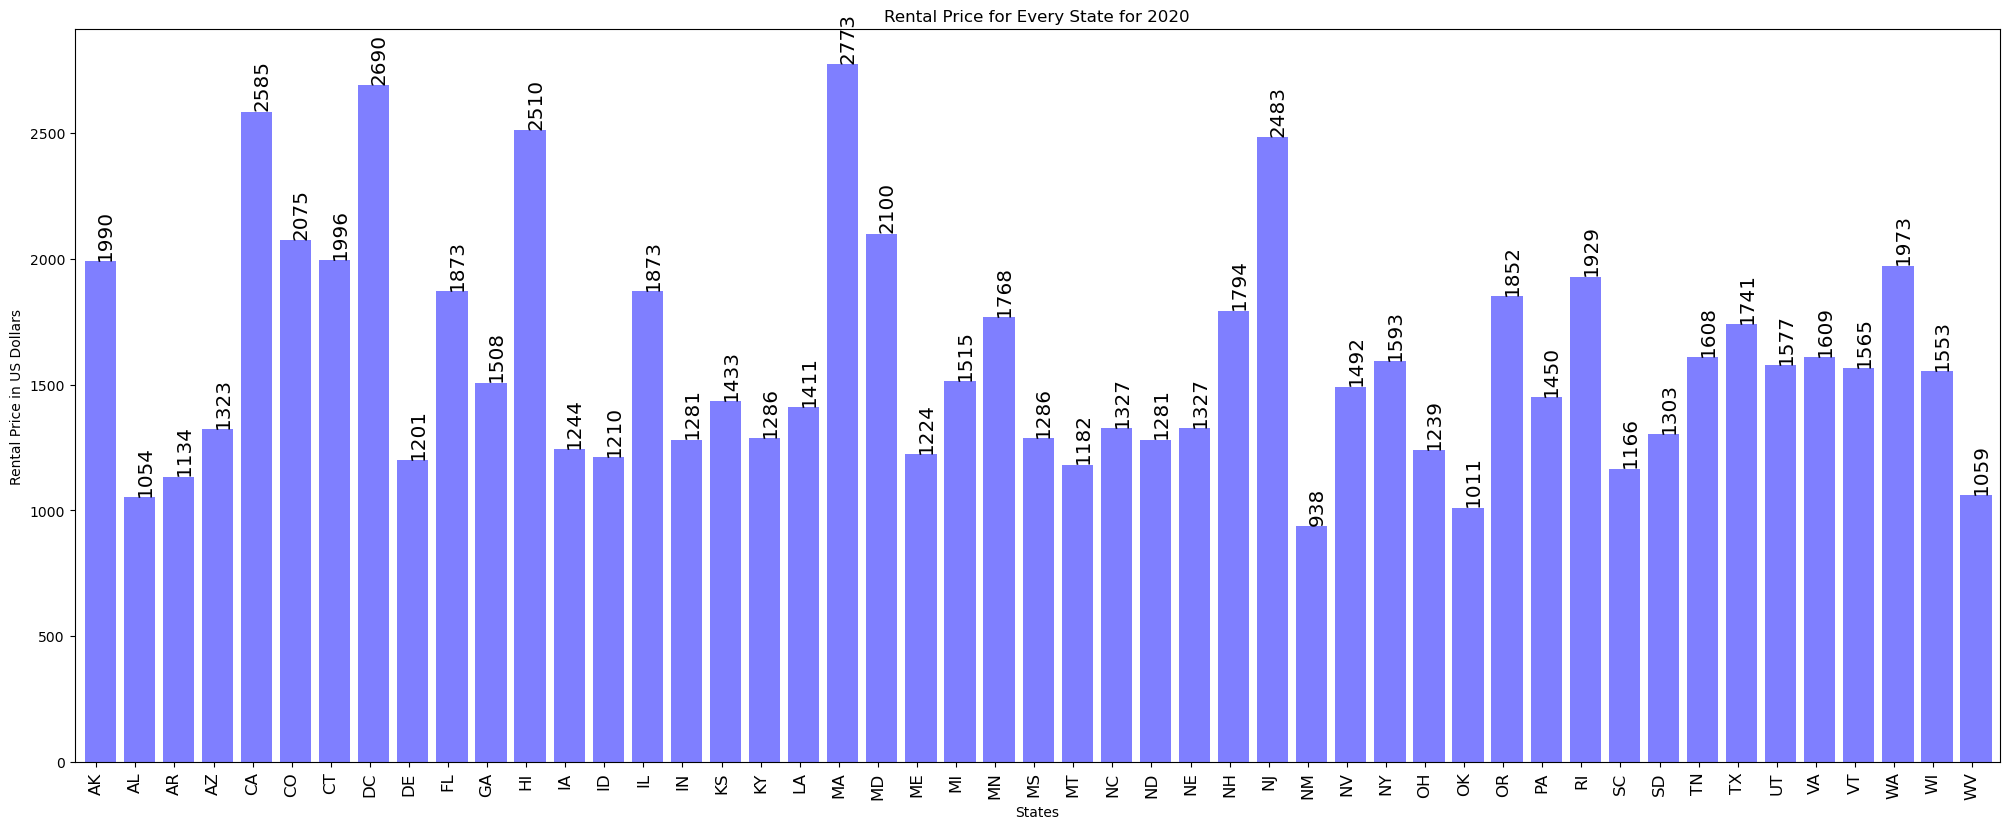

In [57]:
x_axis = np.arange(len(rental_df_clean))
value_for_year = input("Enter the year in a range 2012 - 2022: ")
year_value = "rental_" + value_for_year
tick_locations = [value + 0.3 for value in x_axis]
plt.figure(figsize=(20,8))
plt.xlim(-0.25, len(x_axis))
plt.bar(x_axis, rental_df_clean[year_value], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations , rental_df_clean["State"],rotation="vertical",size = 'large')
plt.tight_layout()
plt.title(f"Rental Price for Every State for {value_for_year}")
plt.xlabel("States")
plt.ylabel("Rental Price in US Dollars")
y = rental_df_clean[year_value]
for index, value in enumerate(y):
    plt.text(index + 0.3, value + 20,
             str(value), size = 'x-large',rotation="vertical")
plt.savefig("HUD_bar_chat.png")
plt.show()

In [58]:
# Set the 'State' to be our index for easy referencing of rows
if 'State' in rental_df_clean.columns:
    rental_df_clean.set_index("State", inplace=True)
else:
    print("Warning: 'State' column not found in DataFrame.")
rental_df_yearly = rental_df_clean.rename(columns={'rental_2022' : '2022', 'rental_2021': '2021',
       'rental_2020' : '2020', 'rental_2019' : '2019',
       'rental_2018' : '2018', 'rental_2017' : '2017',
       'rental_2016' : '2016', 'rental_2015' : '2015',
       'rental_2014': '2014', 'rental_2013' : '2013',
       'rental_2012': '2012'})
rental_df_clean.head()

,rental_2012,rental_2013,rental_2014,rental_2015,rental_2016,rental_2017,rental_2018,rental_2019,rental_2020,rental_2021,rental_2022
State,,,,,,,,,,,
AK,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
AL,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
AR,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
AZ,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609
CA,2031,2132,2237,2345,2465,2469,2555,2619,2585,3040,3143


Enter state code in two letters format:  WA


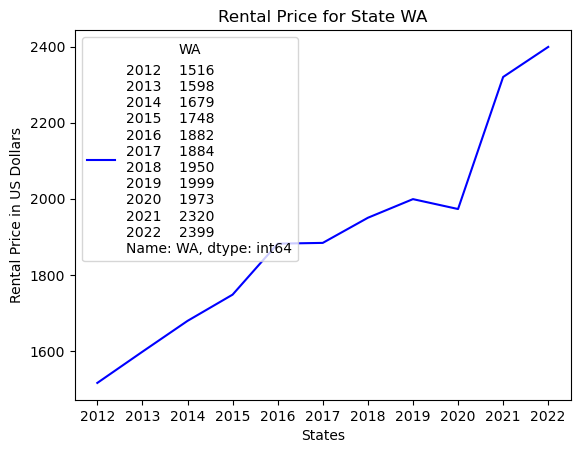

In [63]:
#Enter state code to plot graph
state_value = input('Enter state code in two letters format: ')
# Collect the homelesess number
average_rental = rental_df_yearly[[str(year) for year in range(2012, 2023)]].mean()

# Collect the years where data was collected
years = average_rental.keys()
# Plot the homelesess values for a single state
state_one = plt.plot(years, rental_df_yearly.loc[state_value,["2012","2013","2014","2015","2016","2017",
                                                                  "2018","2019","2020","2021","2022"]],
                                             color="blue",label=rental_df_yearly.loc[state_value])

# Create a legend for our chart
plt.legend(title = state_value, loc="best")
plt.title(f"Rental Price for State {state_value}")
plt.xlabel("States")
plt.ylabel("Rental Price in US Dollars")
plt.savefig("../Outputs/rental_state_graph")
# Show the chart
plt.show()